# Pedagogical Drawing
Visualisation of the idea w/ Gauss repulsion

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import Bio.PDB as pdb
import BioHelpers_FABER.bio_mod as bm
import BioHelpers_FABER.gmap as gm
import BioHelpers_FABER.contacts as con
import matplotlib.lines as lines

Definition of Functions:

In [2]:
def gauss_dist(x, var, center):
    return np.exp(-(x-center)**2/(2 * var**2))

def f(x: float) -> float:
    return 1./x

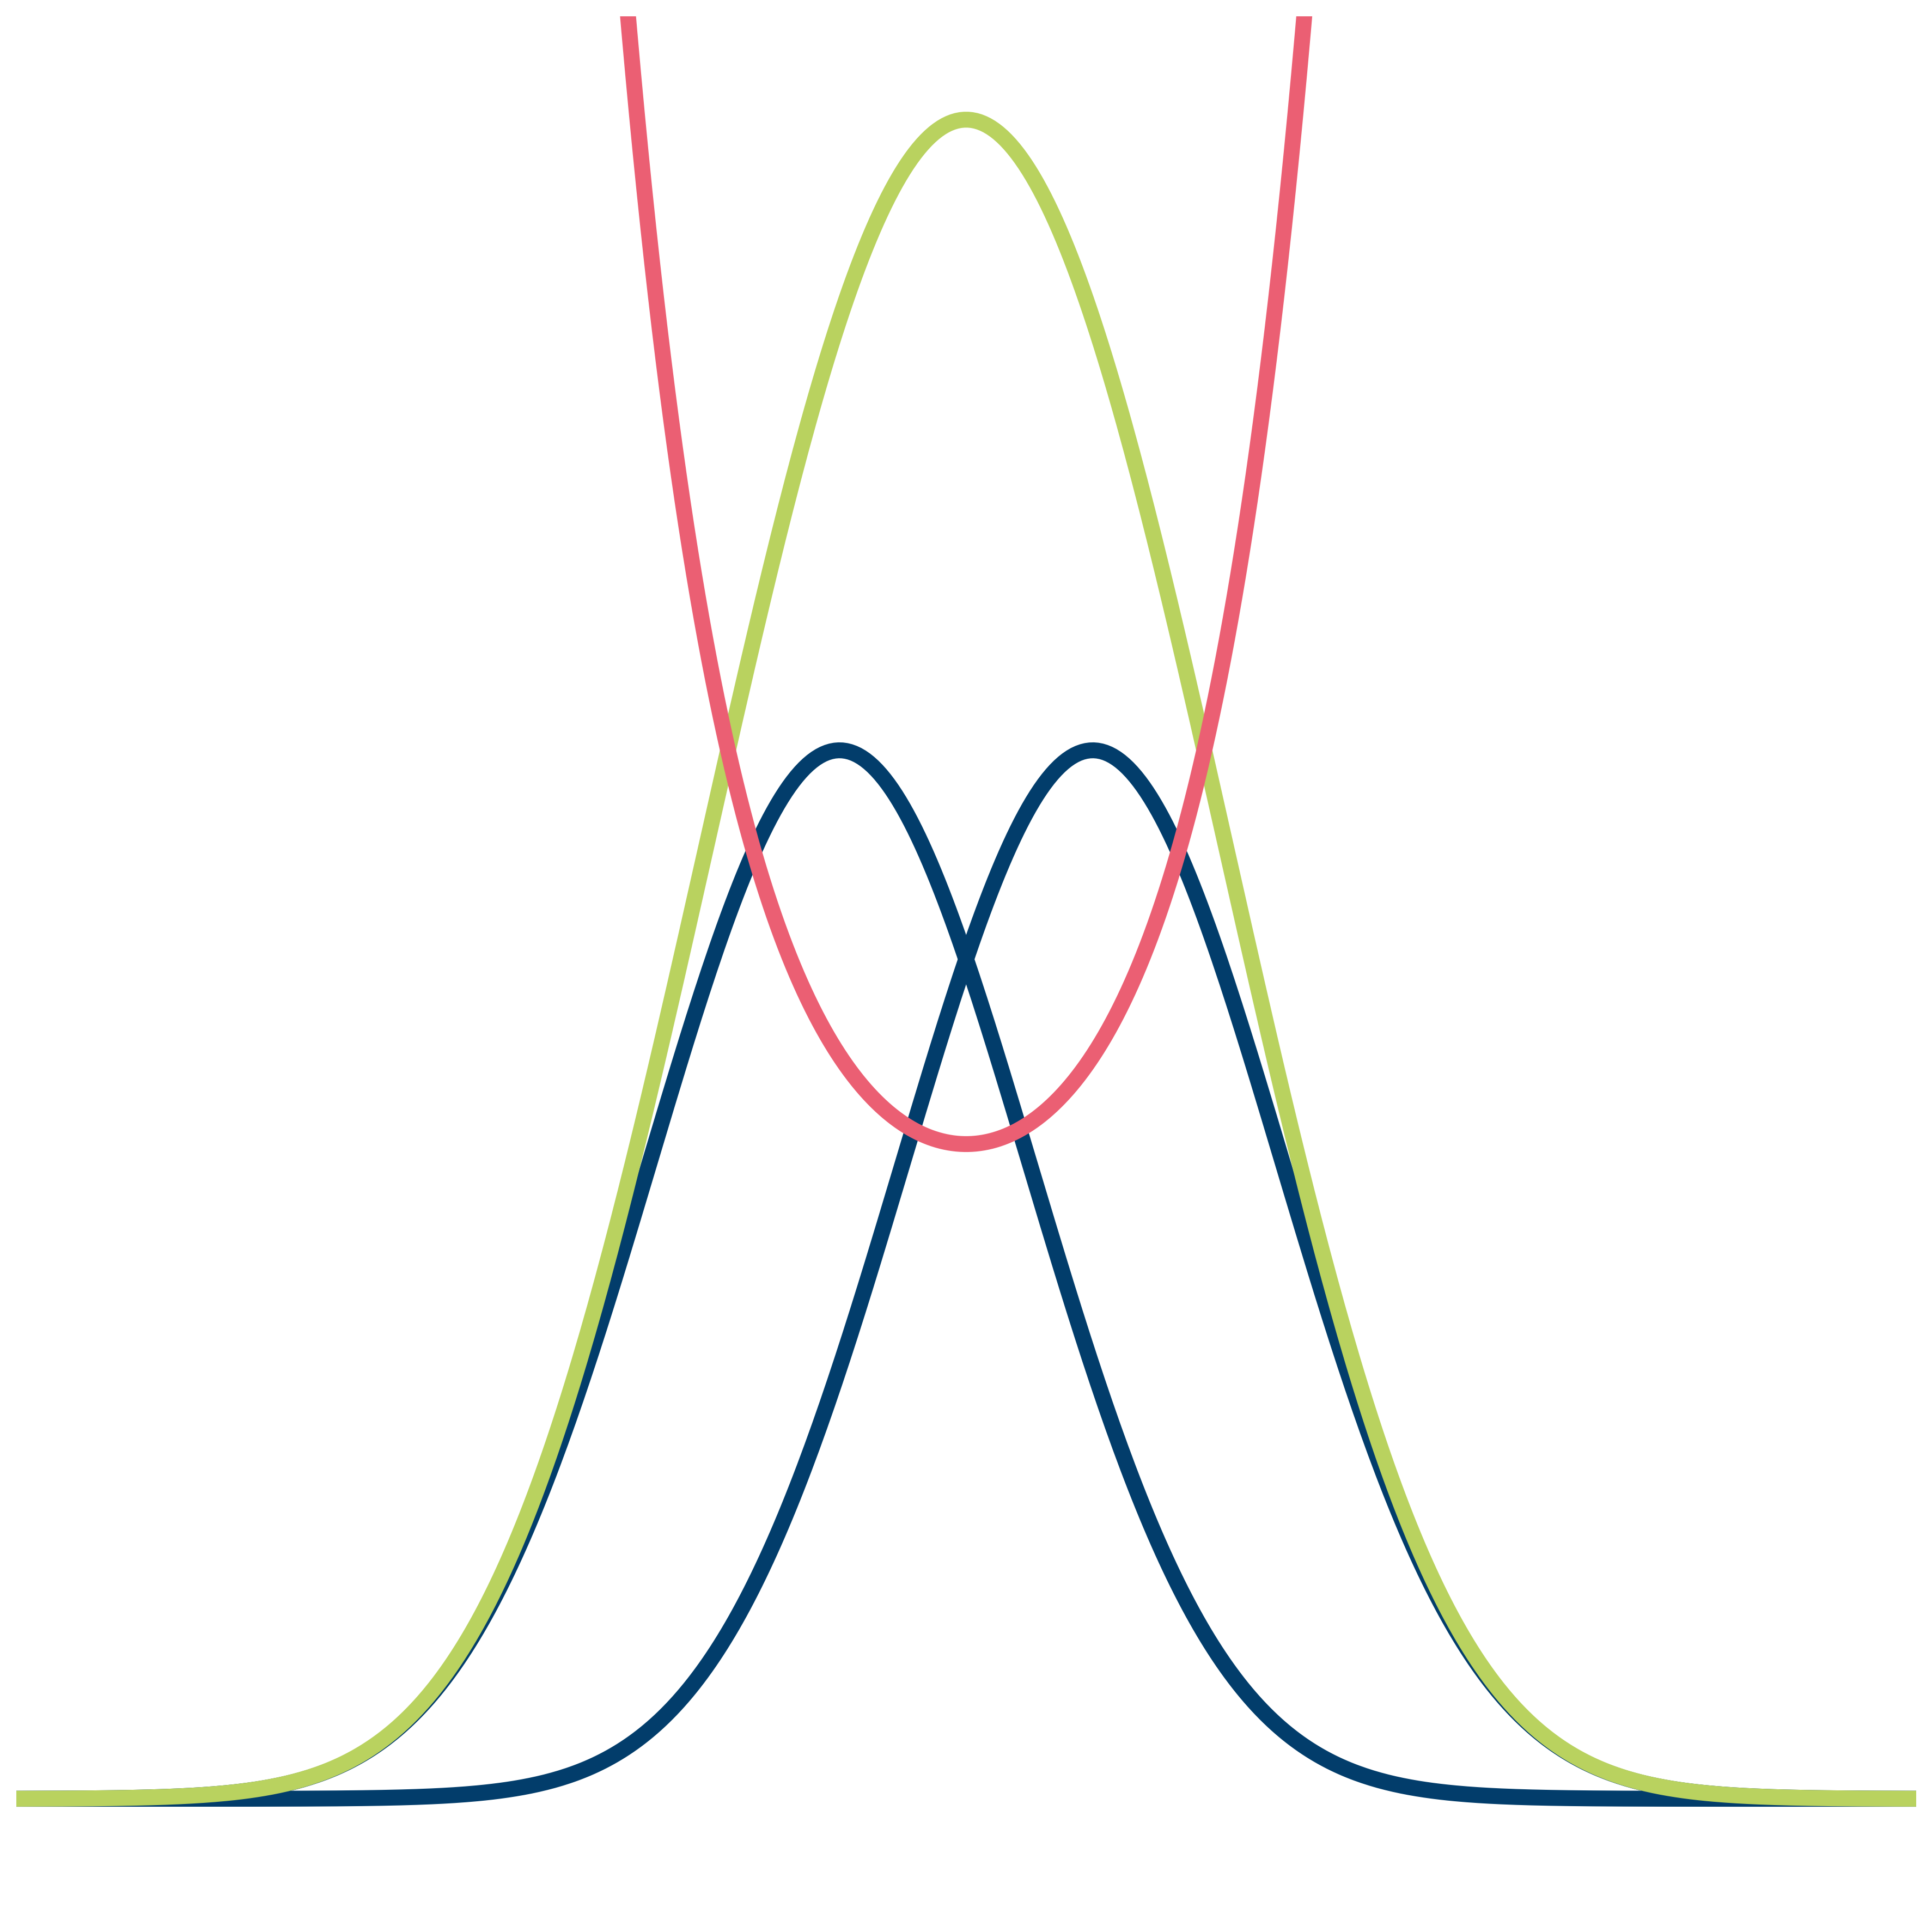

In [3]:
fig, ax = plt.subplots(figsize=(15,15), dpi=300)
ax.set_ylim(top=1.7, bottom=-0.1)
ax.set_xlim(left=-15, right=15)
d = 2 #2 for vic 4.5 for apart
w=7
x = np.linspace(-15,15,500)
ax.plot(x, gauss_dist(x, 3, -d), linewidth=w, color=(2/255,61/255,107/255))
ax.plot(x, gauss_dist(x, 3, d), linewidth=w, color=(2/255,61/255,107/255))
ax.plot(x, gauss_dist(x, 3, -d)+gauss_dist(x, 3, d), linewidth=w, color=(185/255, 210/255, 95/255))
x = np.linspace(-15,15, 500)
ax.plot(x, f(gauss_dist(x, 3, -d)+gauss_dist(x, 3, d)), linewidth=w,color=(235/255, 95/255, 115/255))
plt.axis("off")
plt.savefig("vic.png", transparent=True)
plt.show()

## Visualisation of different Topologies

In [4]:
def lineToContact(line):
    parts = line.split(" ")
    return [int(parts[1].split("/")[1])-1,int(parts[2].split("/")[1])-1]

In [5]:
gauss_con = []
clust_con = []

with open("res_gauss/4frg.res") as f:
    for l in f:
        gauss_con.append(lineToContact(l))
        next(f)
        next(f)

with open("res_clusterDense/4frg.res") as f:
    for l in f:
        clust_con.append(lineToContact(l))
        next(f)
        next(f)

chain = pdb.PDBParser().get_structure("4frg", "../../RNA_Testset/PDB/4frg.pdb")[0]['A']
l = bm.numberOfResidues("../../RNA_Testset/PDB/4frg.pdb")
contactMatrix = bm.calc_contact_matrix(chain, chain, 9.5)
contactList = [[e[0], e[1]] for e in bm.arrToList(contactMatrix) if e[2] == 1]

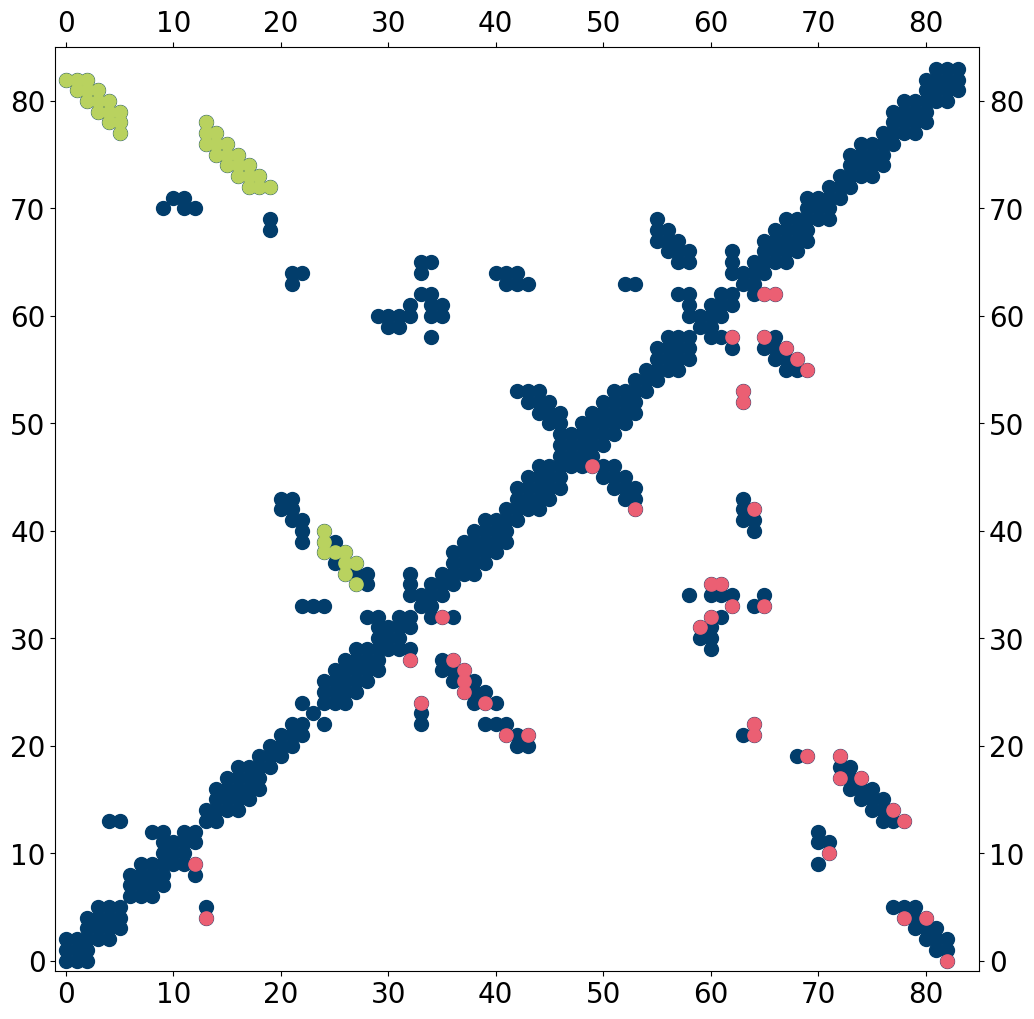

In [6]:
plt.rcParams.update({'font.size': 20})

fig, ax = plt.subplots(figsize=(12,12), frameon=False)
ax.set_aspect(1)
ax.set_frame_on(True)
ax.tick_params(top=True, labeltop=True, bottom=True, labelbottom=True, left=True, labelleft=True, right=True, labelright=True)
ax.set_xlim([-1,l+1])
ax.set_ylim([-1,l+1])
ax.scatter(np.array(contactList)[:,0],np.array(contactList)[:,1], marker='o', s=100, color=(2/255,61/255,107/255))
ax.scatter(np.array(clust_con)[:,0],np.array(clust_con)[:,1], marker='o', s=90, color=(185/255, 210/255, 95/255))
ax.scatter(np.array(gauss_con)[:,1],np.array(gauss_con)[:,0], marker='o', s=90, color=(235/255, 95/255, 115/255))
plt.savefig("cm.png", transparent=True)
plt.show()

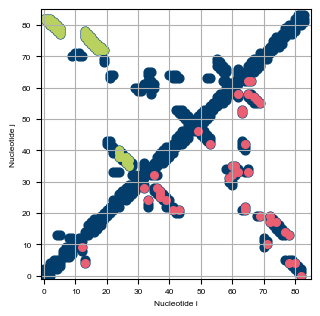

In [7]:
plt.rcParams.update({'font.size': 6})
plt.rcParams.update({'font.family': 'sans-serif'})
plt.rcParams["font.sans-serif"] = "Arial"

fig, ax = plt.subplots(figsize=(3.5,3.5), frameon=False)
ax.set_aspect(1)
ax.set_frame_on(True)
#ax.tick_params(top=True, labeltop=True, bottom=True, labelbottom=True, left=True, labelleft=True, right=True, labelright=True)
ax.set_xlim([-1,l+1])
ax.set_ylim([-1,l+1])
ax.scatter(np.array(contactList)[:,0],np.array(contactList)[:,1], marker='o', s=40, color=(2/255,61/255,107/255))
ax.scatter(np.array(clust_con)[:,0],np.array(clust_con)[:,1], marker='o', s=30, color=(185/255, 210/255, 95/255))
ax.scatter(np.array(gauss_con)[:,1],np.array(gauss_con)[:,0], marker='o', s=30, color=(235/255, 95/255, 115/255))
ax.grid()
ax.set_xlabel("Nucleotide i")
ax.set_ylabel("Nucleotide j")
#plt.savefig("fig-cmap_example.eps", dpi=300, format="eps", bbox_inches="tight")
plt.show()